# Lesson 02 
# Aeden Jameson

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

## 1. Read & Prepare Data

In [2]:
def prepare(fileName = "https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/Intrusion%20Detection.csv"):
    data = pd.read_csv(fileName)

    # These columns have constant values and so can be dropped.
    data.drop('land', axis = 1, inplace = True)
    data.drop('wrong_fragment', axis = 1, inplace = True)
    data.drop('urgent', axis = 1, inplace = True)
    data.drop('is_host_login', axis = 1, inplace = True)
    data.drop('num_outbound_cmds', axis = 1, inplace = True)    


    return data

def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

connections = prepare()

# scale the continuous variables
cont_vars = ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'num_compromised', 'num_root',
             'num_file_creations', 'num_shells', 'num_access_files', 'count', 'serror_rate',
             'rerror_rate','same_srv_rate', 'diff_srv_rate', 'srv_count', 'srv_serror_rate', 'srv_rerror_rate',
             'srv_diff_host_rate']

for c in cont_vars:
    connections.loc[:,c] = scale(connections.loc[:,c])

    
connections = pd.get_dummies(connections, columns=['protocol_type', 'service', 'flag', 'logged_in', 'root_shell',
                                                  'su_attempted', 'is_guest_login'])

connections.head()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,...,flag_SF,logged_in_0,logged_in_1,root_shell_0,root_shell_1,su_attempted_0,su_attempted_1,su_attempted_2,is_guest_login_0,is_guest_login_1
0,-0.159396,-0.028524,0.054945,-0.052515,-0.008904,-0.007165,-0.012391,-0.024085,-0.021026,-0.061588,...,1,0,1,1,0,1,0,0,1,0
1,-0.159396,-0.026829,-0.077172,-0.052515,-0.008904,-0.007165,-0.012391,-0.024085,-0.021026,-0.061588,...,1,0,1,1,0,1,0,0,1,0
2,-0.159396,-0.026946,-0.054522,-0.052515,-0.008904,-0.007165,-0.012391,-0.024085,-0.021026,-0.061588,...,1,0,1,1,0,1,0,0,1,0
3,-0.159396,-0.027414,-0.054522,-0.052515,-0.008904,-0.007165,-0.012391,-0.024085,-0.021026,-0.061588,...,1,0,1,1,0,1,0,0,1,0
4,-0.159396,-0.027472,-0.036025,-0.052515,-0.008904,-0.007165,-0.012391,-0.024085,-0.021026,-0.061588,...,1,0,1,1,0,1,0,0,1,0


## 2. Build a Classifier

#### Train

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(connections.drop(columns = 'Class'), 
                                                    connections['Class'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

model = LogisticRegression(random_state=0,max_iter=1000)

clf = model.fit(x_train, y_train)
print('Done fitting ...')

Done fitting ...


#### Predict

In [4]:
y_pred = clf.predict(x_test)
print(f'{len(y_pred)} Predictions Done')

19462 Predictions Done


## 3. Determine your model accuracy

First let's take a look at our accuracy score, which we expect to be fairly high due to how imbalanced the target class is in our data.

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9998458534580208

Now let's take a look at the confusion matrix.

In [6]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[19453     0]
 [    3     6]]


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19453
           1       1.00      0.67      0.80         9

    accuracy                           1.00     19462
   macro avg       1.00      0.83      0.90     19462
weighted avg       1.00      1.00      1.00     19462



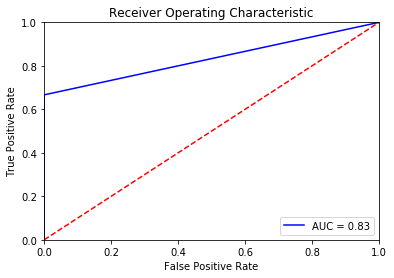

In [8]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4. Modify data by handling class imbalance

In [9]:
!pip install imblearn

     |████████████████████████████████| 163 kB 2.1 MB/s eta 0:00:01


In [10]:
from imblearn.over_sampling import SMOTE 


sm = SMOTE(random_state = 42)
x_res_train, y_res_train = sm.fit_sample(x_train, y_train)
print('Done Smoting...')

Done Smoting...


## 5. Use the same model on updated data

#### Train

In [11]:
clf = model.fit(x_res_train, y_res_train)
print('Done fitting...')

Done fitting...


#### Predict

In [12]:
new_y_pred = clf.predict(x_test)
print(f'{len(y_pred)} Predictions Done')

19462 Predictions Done


## 6. What is the NEW accuracy?

#### Accuracy

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, new_y_pred)

0.999794471277361

In [14]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, new_y_pred)
print(cm)

[[19449     4]
 [    0     9]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, new_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19453
           1       0.69      1.00      0.82         9

    accuracy                           1.00     19462
   macro avg       0.85      1.00      0.91     19462
weighted avg       1.00      1.00      1.00     19462



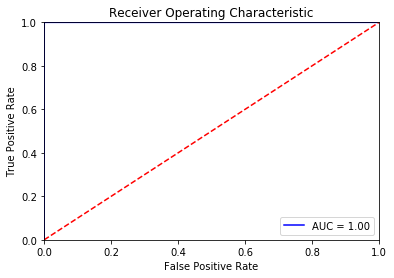

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, new_y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 7. Describe your findings

The precision of the model dropped from 1.0 to .85 while the recall became prefect after smoting. Supposedly my AUC score went up from .83 to 1.00, which I'm suspicious of, but I don't quite know where I went wrong.